<a href="https://colab.research.google.com/github/Sonia-Nehdi/Startup_Expansion_Analysis/blob/main/Data_Analysis_Startup_Expansion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis - Startup Expansion

## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
pip install pandas-profiling[notebook,html]

In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

## Importing & Inspecting Data

In [ ]:
# loading the dataset from excel file to pandas data frame
startups = pd.read_excel('startup-expansion.xlsx')
startups

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue
0,1,Peoria,Arizona,Region 2,Old,2601,48610
1,2,Midland,Texas,Region 2,Old,2727,45689
2,3,Spokane,Washington,Region 2,Old,2768,49554
3,4,Denton,Texas,Region 2,Old,2759,38284
4,5,Overland Park,Kansas,Region 2,Old,2869,59887
...,...,...,...,...,...,...,...
145,146,Paterson,New Jersey,Region 1,New,2251,34603
146,147,Brownsville,Texas,Region 2,New,3675,63148
147,148,Rockford,Illinois,Region 1,New,2648,43377
148,149,College Station,Texas,Region 2,New,2994,22457


In [ ]:
startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Store ID         150 non-null    int64 
 1   City             150 non-null    object
 2   State            150 non-null    object
 3   Sales Region     150 non-null    object
 4   New Expansion    150 non-null    object
 5   Marketing Spend  150 non-null    int64 
 6   Revenue          150 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 8.3+ KB


In [ ]:
startups[['Marketing Spend','Revenue']].describe().round(2)
#Round the numbers to only two decimals

,Marketing Spend,Revenue
count,150.00,150.00
mean,2893.15,39301.43
std,367.86,15465.75
min,1811.00,15562.00
25%,2662.25,21113.50
50%,2898.00,42993.00
75%,3111.50,51145.50
max,3984.00,68828.00


## Preprocessing Data

In [ ]:
startups['City'].nunique()

149

In [ ]:
startups['City'].unique()

array(['Peoria', 'Midland', 'Spokane', 'Denton', 'Overland Park',
       'Yonkers', 'Birmingham', 'Antioch', 'Worcester', 'Rochester',
       'Rialto', 'Santa Maria', 'Las Cruces', 'Jackson', 'Hillsboro',
       'Temecula', 'Tallahassee', 'Fontana', 'Kent', 'Broken Arrow',
       'Concord', 'Modesto', 'Montgomery', 'Burbank', 'Elk Grove',
       'Port St. Lucie', 'Elizabeth', 'Salt Lake City', 'Waco', 'Edison',
       'Boulder', 'Grand Rapids', 'Tyler', 'Charleston', 'Huntsville',
       'Pearland', 'Inglewood', 'Oxnard', 'Miramar', 'Cape Coral',
       'Syracuse', 'Newport News', 'Lewisville', 'Carrollton',
       'San Bernardino', 'Pasadena', 'Roseville', 'Murrieta',
       'San Angelo', 'Olathe', 'Akron', 'Fullerton', 'Manchester',
       'Everett', 'West Covina', 'Thornton', 'Hampton', 'Waterbury',
       'Ventura', 'Davenport', 'Columbia', 'Simi Valley', 'Richmond',
       'Little Rock', 'El Cajon', 'Santa Clara', 'Oceanside', 'Davie',
       'Lakeland', 'Centennial', 'Lowell', 'O

In [ ]:
startups['City'].value_counts()

Rochester    2
Aurora       1
Akron        1
Antioch      1
Jackson      1
            ..
Warren       1
Dayton       1
Norwalk      1
Burbank      1
Fullerton    1
Name: City, Length: 149, dtype: int64

In [ ]:
startups['State'].unique()

array(['Arizona', 'Texas', 'Washington', 'Kansas', 'New York', 'Alabama',
       'California', 'Massachusetts', 'New Mexico', 'Mississippi',
       'Oregon', 'Florida', 'Oklahoma', 'New Jersey', 'Utah', 'Colorado',
       'Michigan', 'South Carolina', 'Virginia', 'Ohio', 'New Hampshire',
       'Connecticut', 'Iowa', 'Arkansas', 'Tennessee', 'North Carolina',
       'Georgia', 'Illinois', 'Montana', 'Indiana', 'South Dakota',
       'Louisiana', 'Minnesota', 'Wisconsin', 'Rhode Island'],
      dtype=object)

In [ ]:
startups['State'].nunique()

35

In [ ]:
startups['State'].value_counts()

California        40
Texas             17
Florida           12
Washington         7
Illinois           5
Colorado           5
Connecticut        4
New Jersey         4
Alabama            4
Georgia            4
New York           3
Michigan           3
South Carolina     3
Massachusetts      3
Utah               3
Kansas             3
Iowa               3
Tennessee          3
Arizona            3
Oregon             2
Ohio               2
North Carolina     2
Virginia           2
Louisiana          2
Rhode Island       1
New Hampshire      1
Mississippi        1
Arkansas           1
New Mexico         1
Indiana            1
Wisconsin          1
Minnesota          1
South Dakota       1
Montana            1
Oklahoma           1
Name: State, dtype: int64

In [ ]:
startups['Sales Region'].unique()

array(['Region 2', 'Region 1'], dtype=object)

In [ ]:
startups['Sales Region'].value_counts()

Region 2    86
Region 1    64
Name: Sales Region, dtype: int64

In [ ]:
startups['New Expansion'].unique()

array(['Old', 'New'], dtype=object)

In [ ]:
startups['New Expansion'].value_counts()

Old    140
New     10
Name: New Expansion, dtype: int64

In [ ]:
startups.isna().sum()

Store ID           0
City               0
State              0
Sales Region       0
New Expansion      0
Marketing Spend    0
Revenue            0
dtype: int64

In [ ]:
startups.duplicated().sum()

0

In [ ]:
len(startups['Store ID'].value_counts())

150

## Exploring & Analysing Data

In [ ]:
startups.sample(10)
# random samples

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue
38,39,Miramar,Florida,Region 1,Old,3488,49506
136,137,Warren,Michigan,Region 1,Old,2736,47262
54,55,West Covina,California,Region 2,Old,2939,21824
17,18,Fontana,California,Region 2,Old,3085,63027
51,52,Fullerton,California,Region 2,Old,3246,44223
45,46,Pasadena,California,Region 2,Old,2790,48254
138,139,Lafayette,Louisiana,Region 1,Old,2603,40255
106,107,South Bend,Indiana,Region 1,Old,3005,21953
105,106,Richardson,Texas,Region 2,Old,3228,22824
95,96,Dayton,Ohio,Region 1,Old,2805,42026


<AxesSubplot:>

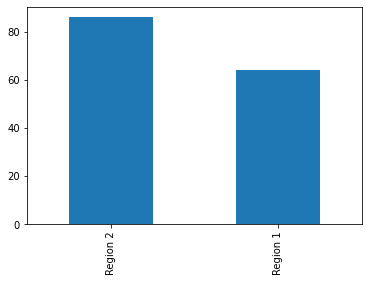

In [ ]:
startups['Sales Region'].value_counts().plot.bar()

In [ ]:
startups.groupby('New Expansion')

{'New': [140, 141, 142, 143, 144, 145, 146, 147, 148, 149], 'Old': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]}

In [ ]:
startups[startups['New Expansion'] == 'Old'].groupby(['State']).sum()['Revenue'].nlargest(10)
# highest 10 revenues (expansion = old + grouped by state)

State
California     1362468
Texas           554964
Florida         479023
Washington      298013
Alabama         221025
New York        160046
Connecticut     158511
Georgia         157656
Colorado        156495
Michigan        147759
Name: Revenue, dtype: int64

In [ ]:
startups[startups['New Expansion'] == 'New'].groupby(['State']).sum()['Revenue'].nlargest(10)
# highest 10 revenues (expansion = new + grouped by state)

State
California    141883
Illinois       91692
Texas          85605
Tennessee      55357
Arizona        48954
New Jersey     34603
Name: Revenue, dtype: int64

In [ ]:
startups['Profit'] = startups['Revenue'] - startups['Marketing Spend']
#create profit column

In [ ]:
startups

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue,Profit
0,1,Peoria,Arizona,Region 2,Old,2601,48610,46009
1,2,Midland,Texas,Region 2,Old,2727,45689,42962
2,3,Spokane,Washington,Region 2,Old,2768,49554,46786
3,4,Denton,Texas,Region 2,Old,2759,38284,35525
4,5,Overland Park,Kansas,Region 2,Old,2869,59887,57018
...,...,...,...,...,...,...,...,...
145,146,Paterson,New Jersey,Region 1,New,2251,34603,32352
146,147,Brownsville,Texas,Region 2,New,3675,63148,59473
147,148,Rockford,Illinois,Region 1,New,2648,43377,40729
148,149,College Station,Texas,Region 2,New,2994,22457,19463


In [ ]:
#Return on investment (ROI) is a performance measure used to evaluate the efficiency or profitability of an investment 
# or compare the efficiency of a number of different investments.
# profit / spent
startups['ROMS'] = round((startups['Profit'] / startups['Marketing Spend']) * 100, 2)
startups

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue,Profit,ROMS
0,1,Peoria,Arizona,Region 2,Old,2601,48610,46009,1768.90
1,2,Midland,Texas,Region 2,Old,2727,45689,42962,1575.43
2,3,Spokane,Washington,Region 2,Old,2768,49554,46786,1690.25
3,4,Denton,Texas,Region 2,Old,2759,38284,35525,1287.60
4,5,Overland Park,Kansas,Region 2,Old,2869,59887,57018,1987.38
...,...,...,...,...,...,...,...,...,...
145,146,Paterson,New Jersey,Region 1,New,2251,34603,32352,1437.23
146,147,Brownsville,Texas,Region 2,New,3675,63148,59473,1618.31
147,148,Rockford,Illinois,Region 1,New,2648,43377,40729,1538.10
148,149,College Station,Texas,Region 2,New,2994,22457,19463,650.07


In [ ]:
# Return of marketing spend pourcentage
startups['ROMS%'] = startups['ROMS'] / 100

In [ ]:
startups

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue,Profit,ROMS,ROMS%
0,1,Peoria,Arizona,Region 2,Old,2601,48610,46009,1768.90,17.6890
1,2,Midland,Texas,Region 2,Old,2727,45689,42962,1575.43,15.7543
2,3,Spokane,Washington,Region 2,Old,2768,49554,46786,1690.25,16.9025
3,4,Denton,Texas,Region 2,Old,2759,38284,35525,1287.60,12.8760
4,5,Overland Park,Kansas,Region 2,Old,2869,59887,57018,1987.38,19.8738
...,...,...,...,...,...,...,...,...,...,...
145,146,Paterson,New Jersey,Region 1,New,2251,34603,32352,1437.23,14.3723
146,147,Brownsville,Texas,Region 2,New,3675,63148,59473,1618.31,16.1831
147,148,Rockford,Illinois,Region 1,New,2648,43377,40729,1538.10,15.3810
148,149,College Station,Texas,Region 2,New,2994,22457,19463,650.07,6.5007


In [ ]:
startups.to_csv('startups-expansion-modified.csv')

## Exploratory Data Analysis Report

In [ ]:
data = pd.read_csv('startups-expansion-modified.csv')
report = ProfileReport(data,title='Startup Expansion')
report.to_file('Startup_Expansion_Analysis.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]